# IŠLAIDOS

+ Agreguoti duomenys iš juridinių asmenų pateiktos informacijos apie gyventojų patirtas įmokas ir gyventojų deklaruotas išlaidas,
kuriomis gali būti mažinamos gyventojų apmokestinamosios pajamos. 
https://data.gov.lt/dataset/gyventoju-patirtos-islaidos
+ Gyventojų registro (GR) duomenys apie Lietuvos Respublikos teritorijoje įregistruotus fizinius asmenis. GR duomenys apie Lietuvos gyventojų amžių ir lytį pagal savivaldybes
https://www.registrucentras.lt/p/1539
https://data.gov.lt/dataset/gyventoju-registro-duomenys-apie-lietuvos-gyventoju-amziu-ir-lyti-pagal-savivaldybes

# Duomenų nuskaitymas

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from pathlib import Path
%matplotlib inline

In [2]:
data_dir = Path().resolve().parents[3] / 'data'
data_dir

WindowsPath('C:/Users/evelina.zigmantaite/Desktop/08-16/notebooks/data')

In [3]:
islaidos=pd.read_csv(data_dir / "datasets/gov/vmi/gyventoju_islaidos/GyventojuIslaidos.csv")

In [4]:
rc = pd.read_csv(data_dir / "datasets/gov/rc/gr/01_gr_open_amzius_lytis_pilietybes_sav_r1.csv")

# Duomenų apžvalga

In [5]:
pd.options.display.max_colwidth = 500
islaidos.head().T

,0,1,2,3,4
_type,datasets/gov/vmi/gyventoju_islaidos/GyventojuIslaidos,datasets/gov/vmi/gyventoju_islaidos/GyventojuIslaidos,datasets/gov/vmi/gyventoju_islaidos/GyventojuIslaidos,datasets/gov/vmi/gyventoju_islaidos/GyventojuIslaidos,datasets/gov/vmi/gyventoju_islaidos/GyventojuIslaidos
_id,f44f4a67-e4ae-433e-a971-fc734cdf082a,879409f4-a478-43a9-997a-d185169f230b,1a2d1af6-da46-4c4f-8f12-1787b41d44d4,dc7a74a7-8328-415d-bf3b-ac92ee0e851d,e70b98aa-fab7-4893-a159-d549e764de3d
_revision,a520537c-6bea-4251-a947-7a65a60e3c0f,4113b4e9-4f76-426c-8a44-0a91f1baf896,b134333d-1335-4421-af33-d397dd3dbc3d,ba3a87c3-3d0b-4ca2-b365-c45e70c2cb09,11313b1c-88e6-42c0-989b-aa619314ee5c
metai,2020,2020,2020,2020,2020
sav_kodas,19,13,13,13,13
sav_pavadinimas,Kauno m. sav.,Vilniaus m. sav.,Vilniaus m. sav.,Vilniaus m. sav.,Vilniaus m. sav.
mm_kodas,db9f2c139efdf133098956d9f057ebce1c6e078eb4fcc22ec8a9d12220c0368b,3cdc64e4d6a7dce93ef20a78335786c36b2b19215cb7d0547d0ae02b304fdc90,8d9ad45da178a723551c78490ab29ba7d3e7b0c6c995d0d34876073dbaf0e534,c17883ac6b4dae58af45cead71157f6ddcdcf4bf92facac32626a7b238b5a410,448c8fe614853c1ddc5ebd62c607df418d4855aba089681075bddfe3b12b366b
ir_kodas,2,1,6,7,1
pavadinimas,Įmokos už aukštąjį ar profesinį mokymąsi.,Gyvybės draudimo įmokos.,"Pastatų, statinių remonto, apdailos (išskyrus renovaciją) darbų išlaidos.","Lengvųjų automobilių remonto paslaugų išlaidos (neįskaitant atsarginių detalių, eksploatacinių medžiagų kainos).",Gyvybės draudimo įmokos.
suma,780.0,725.0,45.0,300.0,480.0


In [6]:
# Kodėl daug nulinių reikšmių sumos stulpelyje?
islaidos[islaidos['suma'] == 0].head().T # 552 reikšmės

,178,854,1316,1676,2230
_type,datasets/gov/vmi/gyventoju_islaidos/GyventojuIslaidos,datasets/gov/vmi/gyventoju_islaidos/GyventojuIslaidos,datasets/gov/vmi/gyventoju_islaidos/GyventojuIslaidos,datasets/gov/vmi/gyventoju_islaidos/GyventojuIslaidos,datasets/gov/vmi/gyventoju_islaidos/GyventojuIslaidos
_id,ce339c37-1519-4a4b-9321-9adf9478e32f,77e74a4f-2cc0-42de-b143-9db7def3d5a8,0a6581b6-b17d-4eea-8117-ab21bbf075cb,b0d5f02d-b342-45da-880d-f6fa06b63f37,cfaccd75-5163-46f3-b7b1-30b6daa530c3
_revision,559bd79d-4fcb-415f-bb77-42f820a3d604,a45978fd-762c-45dd-8298-d794f13e754b,1c2d81f3-f166-481f-a272-f6e11dcf093e,476753c2-aeb4-4e79-8b23-7616d58fd5b1,1c8e65fa-25d8-4d0b-ad47-16aa25af93e4
metai,2020,2020,2020,2020,2020
sav_kodas,21,66,21,13,29
sav_pavadinimas,Klaipėdos m. sav.,Panevėžio r. sav.,Klaipėdos m. sav.,Vilniaus m. sav.,Šiaulių m. sav.
mm_kodas,021e9590886072dfb018243f148916278180a20b9dfd91ecb3fc07c59636ab4d,15417c6299bcef725693d8b31306824395d55c25e79945d1a3c498205ef05b52,25c0d1e8fe6b0679eafdeb9228f001e7f0abdf1cc300d0735b68c8a487e106ea,2f9e4455d57017f83f7e9d4c6f45b8f4559767b70c4f4dcf543b74401c19998e,2695f835c5a72b5d97439b5be909f0596eaaa12f9f991926a6ea338a5e75f480
ir_kodas,3,1,1,4,3
pavadinimas,"Būsto kredito, suteikto iki 2008-12-31, palūkanos.",Gyvybės draudimo įmokos.,Gyvybės draudimo įmokos.,Pensijų kaupimo įmokos.,"Būsto kredito, suteikto iki 2008-12-31, palūkanos."
suma,0.0,0.0,0.0,0.0,0.0


Kai kurie Dtype neatitinka tipo nurodyto struktūros apraše. Pvz: sav_kodas

In [7]:
islaidos.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438262 entries, 0 to 438261
Data columns (total 10 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   _type            438262 non-null  object 
 1   _id              438262 non-null  object 
 2   _revision        438262 non-null  object 
 3   metai            438262 non-null  int64  
 4   sav_kodas        438262 non-null  int64  
 5   sav_pavadinimas  438262 non-null  object 
 6   mm_kodas         438262 non-null  object 
 7   ir_kodas         438262 non-null  int64  
 8   pavadinimas      438262 non-null  object 
 9   suma             438262 non-null  float64
dtypes: float64(1), int64(3), object(6)
memory usage: 33.4+ MB


In [8]:
islaidos.nunique()

_type                   1
_id                438262
_revision          438262
metai                   1
sav_kodas              60
sav_pavadinimas        60
mm_kodas           384280
ir_kodas                9
pavadinimas             9
suma                 5943
dtype: int64

# Išlaidų rūšys pagal populiarumą

Brėžiame diagramą, kuri vaizduoja kiekvienos išlaidų rūšies dažnį šiuose duomenyse.

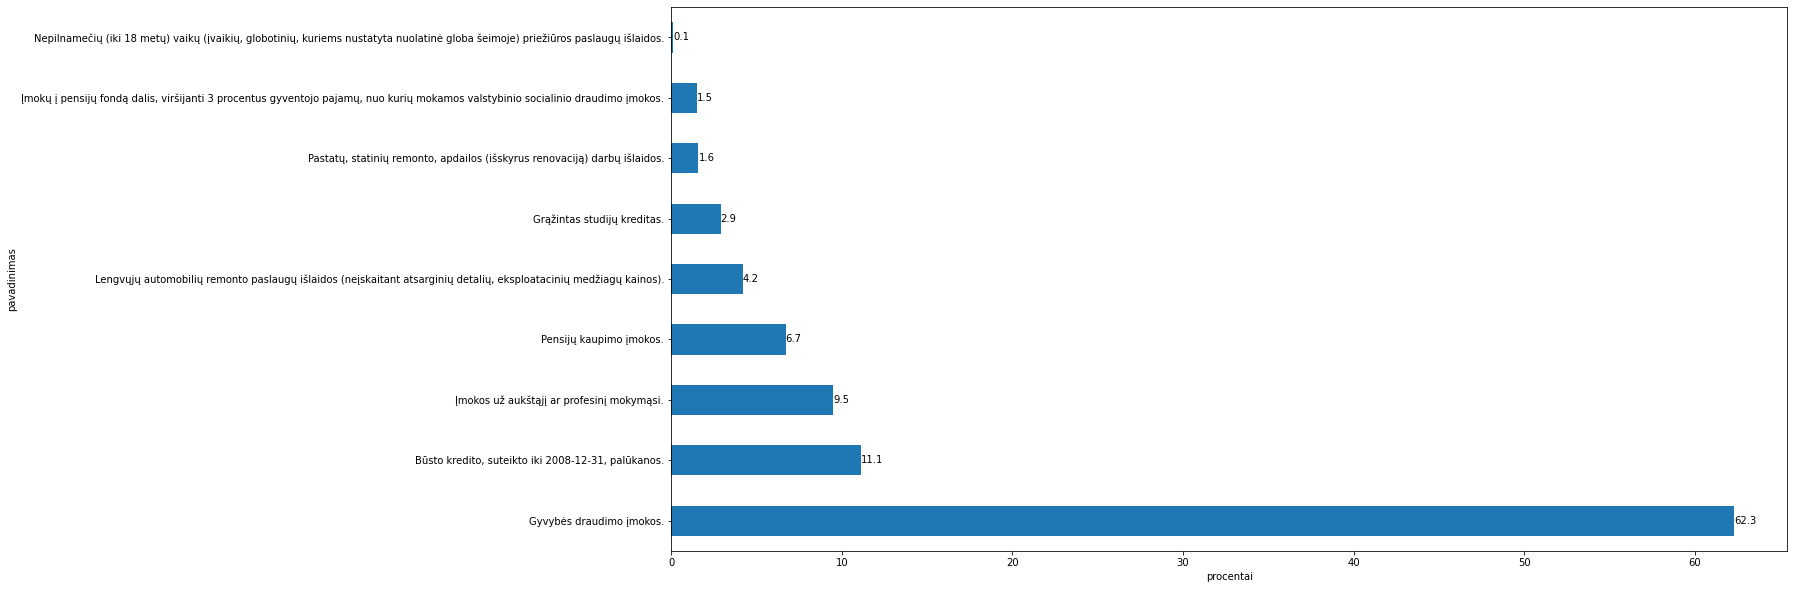

In [9]:
mpl.rc('figure', figsize=(20,10))
df = round((islaidos['pavadinimas'].value_counts().sort_values(ascending=False) 
                 / islaidos['pavadinimas'].value_counts().sort_values(ascending=False).sum())*100,1)
ax = df.plot.barh()
ax.bar_label(ax.containers[0])
plt.xlabel('procentai')
plt.ylabel('pavadinimas')
plt.show()

Skaičiuojant procentinę dalį pastebime, kad "Gyvybės draudimo įmokos" sudaro net 62 % visų išlaidų rūšių, kuriomis gali būti mažinamos gyventojų apmokestinamosios pajamos

Taip pat galime pažiūrėt, kaip bendrai yra pasiskirstę visos išlaidų rūšys.

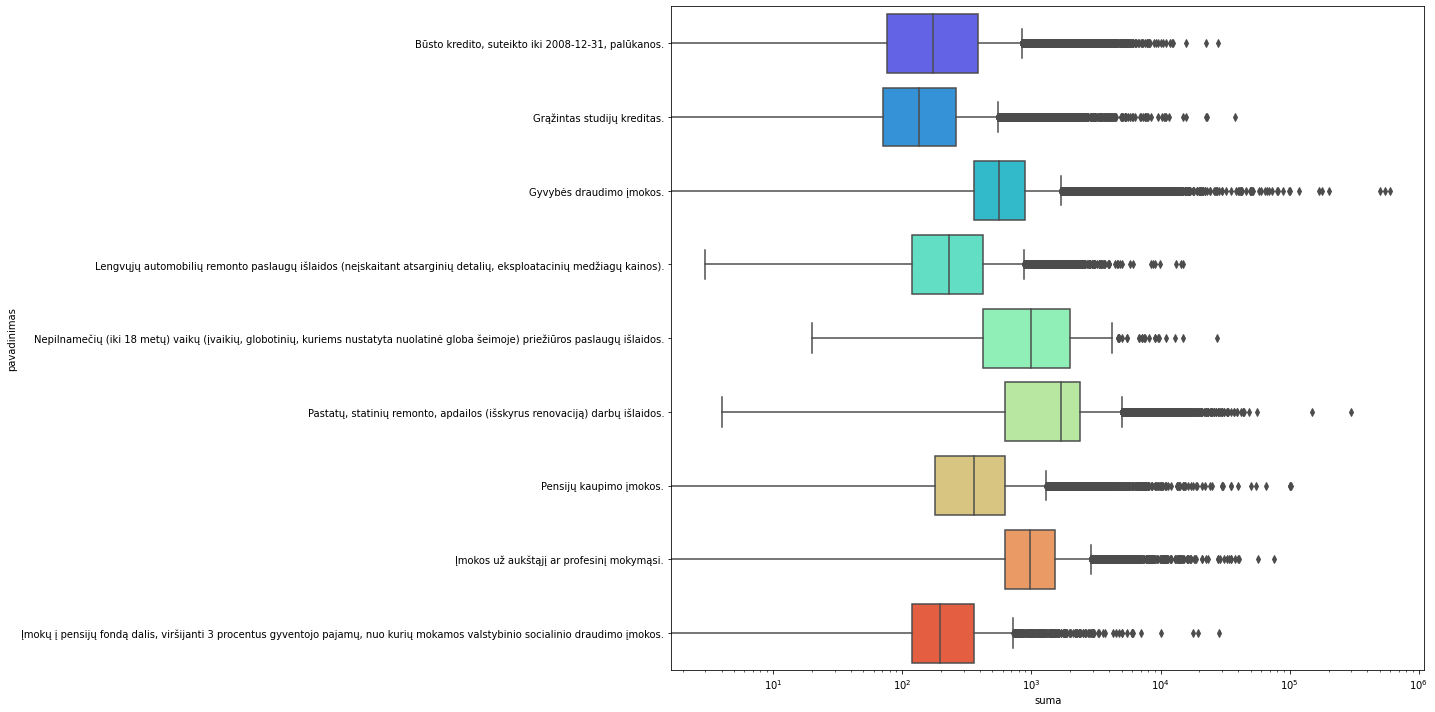

In [10]:
vienas = islaidos.set_index(['_id','pavadinimas'])['suma'].unstack() #.plot.box(logy = True)
fig, ax= plt.subplots(figsize=(20, 10))
ax.set_xscale('log')
g = sns.boxplot(data=vienas , palette='rainbow', orient="h", ax=ax)
plt.xlabel('suma')
plt.tight_layout()

Iš boxplot diagramų matome, kad "Gyvybės draudimo įmokos" turi labai daug išsiskiriančių reikšmių. Kyla klausimas dėl 60000 ribos duomenyse. Taip pat matome, kad didžiausią medianą turi "Pastatų, statinių remonto, apdailos (išskyrus renovaciją) darbų išlaidos, o labiausiai svyruojančios išlaidų sumos yra dėl "Būsto kredito, suteikto iki 2008-12-31, palūkanos" ir "Nepilnamečių (iki 18 metų) vaikų (įvaikių, globotinių, kuriems nustatyta nuolatinė globa šeimoje) priežiūros paslaugų išlaidos."

Naudojame procentų $\sum(1/2)^n$ progresiją. Šiuo būdu galime patikrinti, kokią sumą sudaro įmokos, kurias moka pvz. 50% mažiausiai sumokančių gyventojų arba mažiau nei 1% daugiausiai sumokančių gyventojų:

In [11]:
rusis_islaidos = islaidos.loc[islaidos['pavadinimas'] == 'Gyvybės draudimo įmokos.']

_50H = rusis_islaidos.sort_values('suma', ascending = True).head(round(0.5*len(rusis_islaidos)))
a = _50H['suma'].sum()
_50T = rusis_islaidos.sort_values('suma', ascending = True).tail(round(0.5*len(rusis_islaidos)))

_25H =_50T.sort_values('suma', ascending = True).head(round(0.5*len(_50T)))
b = _25H['suma'].sum()
_25T = _50T.sort_values('suma', ascending = True).tail(round(0.5*len(_50T)))

_12_5H = _25T.sort_values('suma', ascending = True).head(round(0.5*len(_25T)))
c = _12_5H['suma'].sum()
_12_5T = _25T.sort_values('suma', ascending = True).tail(round(0.5*len(_25T)))

_6_25H = _12_5T.sort_values('suma', ascending = True).head(round(0.5*len(_12_5T)))
d = _6_25H['suma'].sum()
_6_25T = _12_5T.sort_values('suma', ascending = True).tail(round(0.5*len(_12_5T)))

_3_125H = _6_25T.sort_values('suma', ascending = True).head(round(0.5*len(_6_25T)))
e = _3_125H['suma'].sum()
_3_125T = _6_25T.sort_values('suma', ascending = True).tail(round(0.5*len(_6_25T)))

_1_56H = _3_125T.sort_values('suma', ascending = True).head(round(0.5*len(_3_125T)))
f = _1_56H['suma'].sum()
_1_56T = _3_125T.sort_values('suma', ascending = True).tail(round(0.5*len(_3_125T)))

_0_8H = _1_56T.sort_values('suma', ascending = True).head(round(0.5*len(_1_56T)))
g = _0_8H['suma'].sum()

_0_8T = _1_56T.sort_values('suma', ascending = True).tail(round(0.5*len(_1_56T)))
h = _0_8T['suma'].sum()

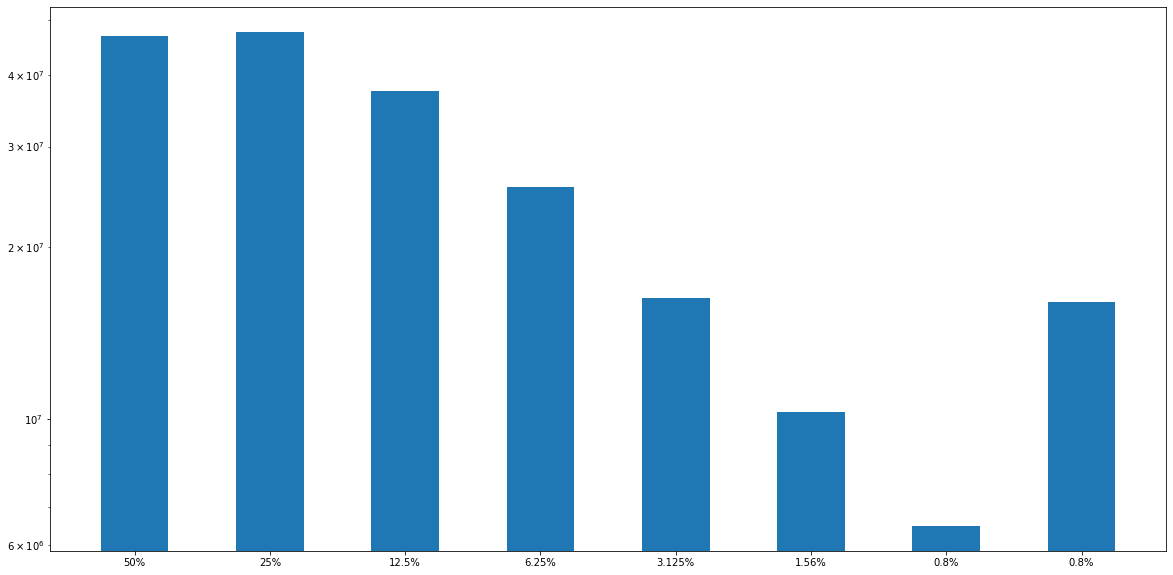

In [12]:
fig = plt.figure()
s = fig.add_subplot(111)
s.bar([1, 2, 3, 4, 5, 6, 7, 8], [a, b, c, d, e, f, g, h], width=.5, log = True)
# plt.ticklabel_format(style = 'plain')
plt.xticks((1, 2, 3, 4, 5, 6, 7, 8), ('50%', '25%', '12.5%', '6.25%', '3.125%', '1.56%', '0.8%', '0.8%'))
plt.show()

In [13]:
ciklui = rusis_islaidos.sort_values( by = 'suma', ascending = True)
procentams = [a, b, c, d, e, f, g, h]
percentage = []
for i in procentams:
    pct = (i / ciklui['suma'].sum()) * 100
    percentage.append(round(pct,2))
print(percentage)

[22.67, 23.06, 18.2, 12.33, 7.88, 4.97, 3.14, 7.75]


# Vilniaus miesto ir Neringos savivaldybių išlaidų palyginimas

Norėdami palyginti savivaldybes tarpusavyje, pirmiausia turime jas normalizuoti pagal gyventojų skaičių. Tam esame nusiskaitę duomenis iš gyventojų registro apie Lietuvos gyventojų amžių ir lytį pagal savivaldybes

Pasirenkame palyginti būtent Neringos ir Vilniaus miesto savivaldybes, nes apskaičiavus visų išlaidų sumos medianą, paaiškėja, jog Neringos savivaldybėje išlaidų dydžiai yra aukščiausi. 

In [14]:
mediana = islaidos.groupby(['sav_pavadinimas'])['suma'].median().sort_values(ascending = False)
mediana.head().to_frame()

,suma
sav_pavadinimas,
Neringos sav.,615.0
Palangos m. sav.,559.0
Skuodo r. sav.,540.0
Birštono sav.,540.0
Pagėgių sav.,522.0


Todėl lyginame jas dalindami visų išlaidų rūšių bendras sumas iš toje savivaldybėje gyvenančių gyventojų skaičiaus, šiuos duomenis gauname iš gyventojų registro. 

In [15]:
vilnius = islaidos.loc[islaidos['sav_pavadinimas'] == 'Vilniaus m. sav.']
vilnius1 = rc.loc[rc['sav_pavadinimas'] == 'Vilniaus m. sav.']
is_viso_vilnius = vilnius1.shape[0]
vilnius_dal_2 = vilnius.groupby(['pavadinimas'])['suma'].sum()/(is_viso_vilnius)
vilnius_dal_2.to_frame()

,suma
pavadinimas,
"Būsto kredito, suteikto iki 2008-12-31, palūkanos.",10.442536
Grąžintas studijų kreditas.,1.798399
Gyvybės draudimo įmokos.,99.473558
"Lengvųjų automobilių remonto paslaugų išlaidos (neįskaitant atsarginių detalių, eksploatacinių medžiagų kainos).",3.172512
"Nepilnamečių (iki 18 metų) vaikų (įvaikių, globotinių, kuriems nustatyta nuolatinė globa šeimoje) priežiūros paslaugų išlaidos.",0.578828
"Pastatų, statinių remonto, apdailos (išskyrus renovaciją) darbų išlaidos.",13.485207
Pensijų kaupimo įmokos.,12.192533
Įmokos už aukštąjį ar profesinį mokymąsi.,20.416404
"Įmokų į pensijų fondą dalis, viršijanti 3 procentus gyventojo pajamų, nuo kurių mokamos valstybinio socialinio draudimo įmokos.",0.731968


In [16]:
neringa = islaidos.loc[islaidos['sav_pavadinimas'] == 'Neringos sav.']
neringa1 = rc.loc[rc['sav_pavadinimas'] == 'Neringos sav.']
is_viso_neringa = neringa1.shape[0]
neringa_dal_2 = neringa.groupby(['pavadinimas'])['suma'].sum()/(is_viso_neringa)
neringa_dal_2.to_frame()

,suma
pavadinimas,
"Būsto kredito, suteikto iki 2008-12-31, palūkanos.",24.978014
Grąžintas studijų kreditas.,2.251137
Gyvybės draudimo įmokos.,202.992987
"Lengvųjų automobilių remonto paslaugų išlaidos (neįskaitant atsarginių detalių, eksploatacinių medžiagų kainos).",4.307430
"Nepilnamečių (iki 18 metų) vaikų (įvaikių, globotinių, kuriems nustatyta nuolatinė globa šeimoje) priežiūros paslaugų išlaidos.",0.676080
"Pastatų, statinių remonto, apdailos (išskyrus renovaciją) darbų išlaidos.",17.137604
Pensijų kaupimo įmokos.,13.765732
Įmokos už aukštąjį ar profesinį mokymąsi.,41.267817
"Įmokų į pensijų fondą dalis, viršijanti 3 procentus gyventojo pajamų, nuo kurių mokamos valstybinio socialinio draudimo įmokos.",0.232942


Peržiūrėjus abi lenteles galime daryti išvadą, jog Neringos savivaldybėje gyvena turtingesni žmonės ir, kad ten pragyvenimas greičiausiai kainuoja daugiau, nei Vilniaus miesto savivaldybėje, kadangi beveik visos apskaičiuotos sumos Neringos savivaldybėje lenkia Vilniaus miesto savivaldybės išlaidas